# Import libraries & Load data


Data source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.linear_model import LogisticRegression


# metrics
from sklearn.metrics import classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import auc, plot_roc_curve, precision_recall_curve


# # plotting
import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 18}
matplotlib.rc('font', **font)

sns.set_theme(rc={'figure.figsize': (14, 8)})

In [2]:
def get_label_counts(labels):
  label_counts = pd.Series(labels).value_counts().reset_index(name='counts')
  label_counts['percent (%)'] = (label_counts['counts'] / labels.shape[0] * 100).round(2)
  label_counts = label_counts.rename(columns={'index': 'class'}).set_index('class')
  return label_counts

In [4]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/platinumVN/telco_customer_churn/main/Telco-Customer-Churn.csv?token=GHSAT0AAAAAABS5YHD22TEXFGGQ3B6NFASIYSAOTNQ')
df = raw_data

## Dataset

In [5]:
# Information:
print(df.shape)
df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [6]:
# Describe statistics:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# First 5 columns:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Last 5 columns
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [9]:
# Show unique values of all columns:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name, df[column_name].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

***Description:***

**Size: (7043, 21)**
<br> - 7043 rows: each rows represent a customer (customer ID is unique)
<br> - 21 columns: 21 attribute, included 'Churn' columns (which is our prediction model target variable)

<br> **Attributes:**
1. CustomerID: A unique ID that identifies each customer.
2. Gender: The customer’s gender: Male, Female
3. SeniorCitizen: Indicates if the customer is 65 or older: Yes, No
4. Partner: -- ? Indicates if the customer is married: Yes, No
5. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
6. tenure (in months): Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
7. PhoneService: Indicates if the customer subscribes to home phone service with the company: Yes, No
8. MultipleLines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
9. InternetService: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic.
10. OnlineSecurity: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, 'No internet service'
11. OnlineBackup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, 'No internet service'
12. DeviceProtection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, 'No internet service'
13. TechSupport: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, 'No internet service'
14. StreamingTV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
15. StreamingMovies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
17. PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No
18. PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
19. MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
20. TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
21. Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Source: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

**Additional info:**

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents
- 10, 11, 12, 13, 14, 15 are depend on 9 (a user must use internet service before having online security (additional) service)

In [10]:
# Which are categorical variables?

cat_vars = df.select_dtypes(include='object').columns
cat_vars

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
# Which are numerical variables?

num_vars = df.select_dtypes(include='number').columns
num_vars

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

## Wrangling data

### Data types, ranges, duplicating rows

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# Convert SeniorCitizen into categorical variables:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [14]:
# Convert TotalCharges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

### Handle missing values

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
# Tenure = 0?
print(df['tenure'].max()) # 72/12 = 6 years
df[df['tenure'] == 0] # < 1 months

72


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
df[df['tenure'] == 72]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,5248-YGIJN,Male,No,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
35,6234-RAAPL,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
59,5954-BDFSG,Female,No,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No
62,0526-SXDJP,Male,No,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962.00,No
94,9848-JQJTX,Male,No,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,No,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.40,No
7007,2274-XUATA,Male,Yes,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7022,7203-OYKCT,Male,No,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No
7037,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No


In [19]:
# Drop customers with tenure = 0 (which is also totalcharges = 0)
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

### Handle categorical variables

In [20]:
# Encode label variables:
labelencoder = LabelEncoder()
df['Churn_n'] = labelencoder.fit_transform(df['Churn'])

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_n
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [22]:
# Drop customer id columns
df_X = df.iloc[:,1:-2]
df_X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [23]:
df_X_dummies = pd.get_dummies(df_X)
df_X_dummies.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [24]:
print(df_X_dummies.shape)

(7032, 46)


# Exploratory Data Analysis

## 1 Descriptive statistics

In [25]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn_n
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

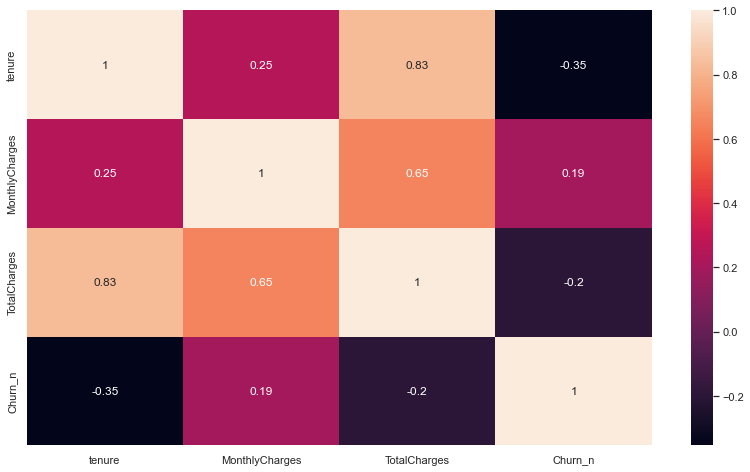

In [26]:
sns.heatmap(df.corr(), annot=True)

## 2 Variables analysis - Univariate - Bivariate

Goals: 
- Distribution
- why those churned customer left our services?

By: deep dive into the relationships of other variables (19 variables in total, excluded customerID, can be grouped into 4 groups of information as shown above) with 'Churn' variable

In [27]:
# customerID          7043
# gender                 2
# SeniorCitizen          2
# Partner                2
# Dependents             2
# tenure                73
# PhoneService           2
# MultipleLines          3
# InternetService        3
# OnlineSecurity         3
# OnlineBackup           3
# DeviceProtection       3
# TechSupport            3
# StreamingTV            3
# StreamingMovies        3
# Contract               3
# PaperlessBilling       2
# PaymentMethod          4
# MonthlyCharges      1585
# TotalCharges        6531
# Churn                  2

### 2.1 Churn

- Data is imbalanced, but it's reasonable: if churn Yes/No percentages are equal, business performance is too bad 

In [28]:
get_label_counts(df['Churn'])

,counts,percent (%)
class,,
No,5163,73.42
Yes,1869,26.58


C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

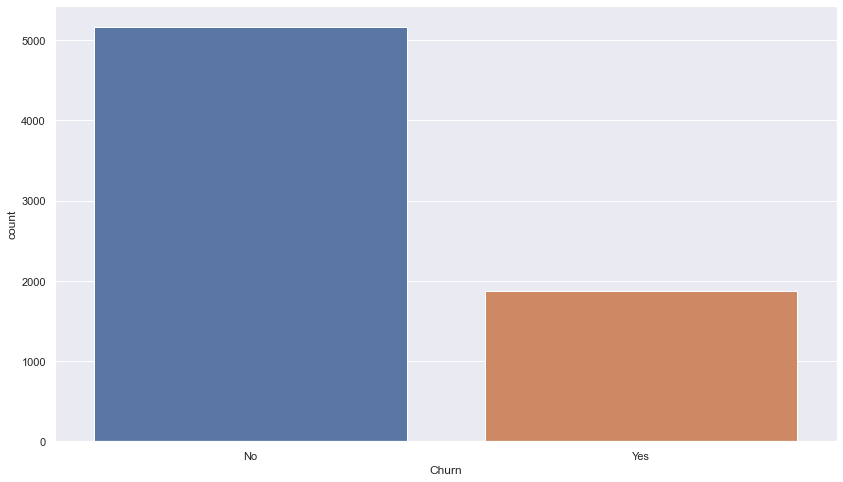

In [29]:
sns.countplot(df['Churn'])

### 2.2 Demographic info about customers (gender, seniority, partner and dependent)

- Gender: the num of people in each gender share almost equal proportion to the other.
- SeniorCitizen: more than 80% of customers is under 65
- Partner: 

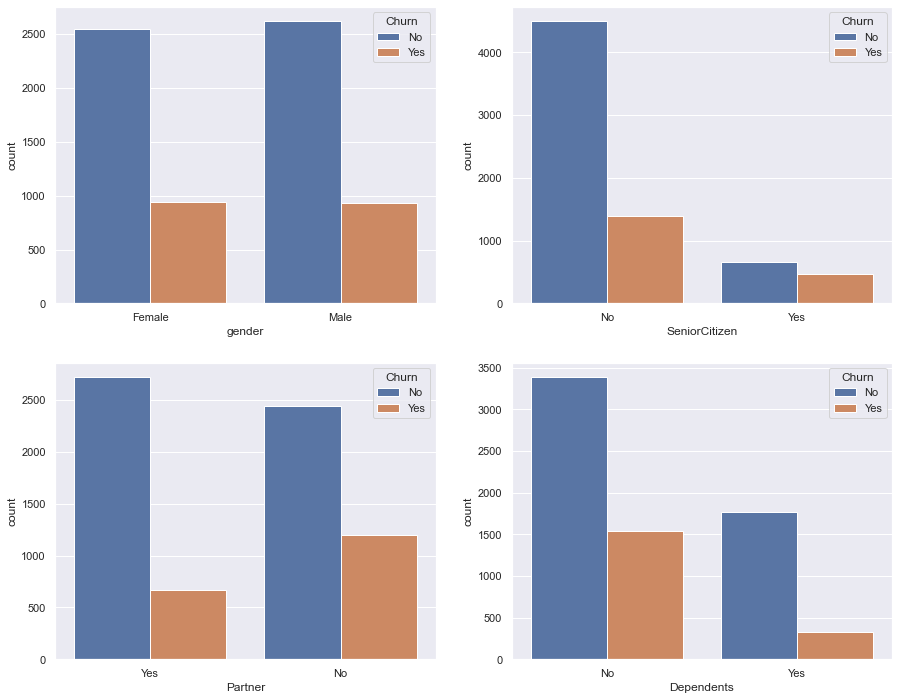

In [30]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,12))

ax = sns.countplot(x = 'gender', data = df, hue = 'Churn', ax = axes[0,0])
ax = sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn', ax = axes[0,1])
ax = sns.countplot(x = 'Partner', data = df, hue = 'Churn', ax = axes[1,0])
ax = sns.countplot(x = 'Dependents', data = df, hue = 'Churn', ax = axes[1,1])

(0.0, 0.45)

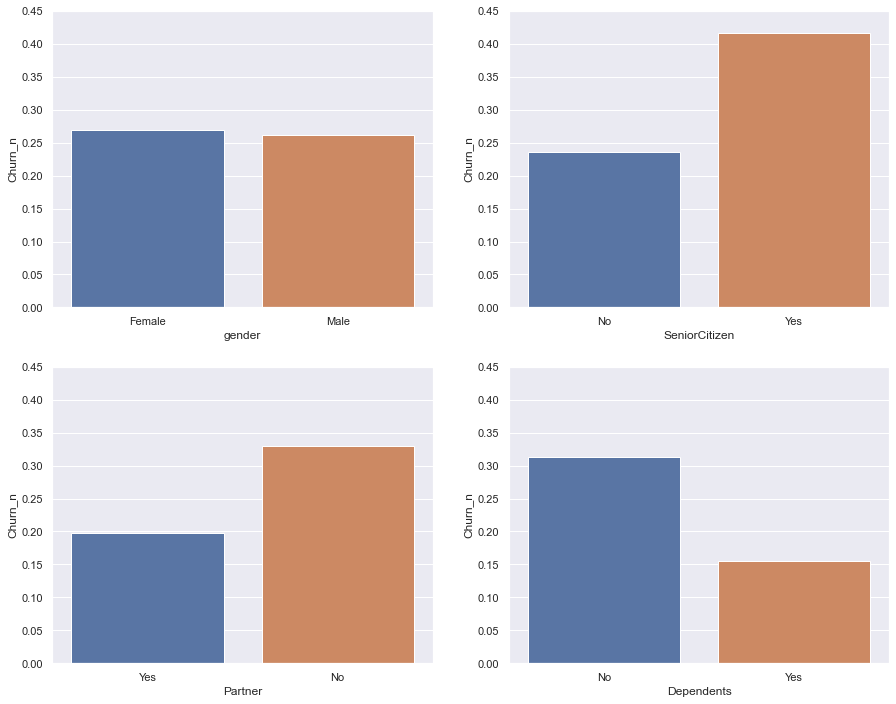

In [31]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,12))

ax = sns.barplot(x = 'gender', y = 'Churn_n', data = df, ax = axes[0,0], ci = None)
ax.set_ylim(0,0.45)

ax = sns.barplot(x = 'SeniorCitizen', y = 'Churn_n', data = df, ax = axes[0,1], ci = None)
ax.set_ylim(0,0.45)

ax = sns.barplot(x = 'Partner', y = 'Churn_n', data = df, ax = axes[1,0], ci = None)
ax.set_ylim(0,0.45)

ax = sns.barplot(x = 'Dependents', y = 'Churn_n', data = df, ax = axes[1,1], ci = None)
ax.set_ylim(0,0.45)

**Gender**

In [32]:
get_label_counts(df['gender'])

,counts,percent (%)
class,,
Male,3549,50.47
Female,3483,49.53


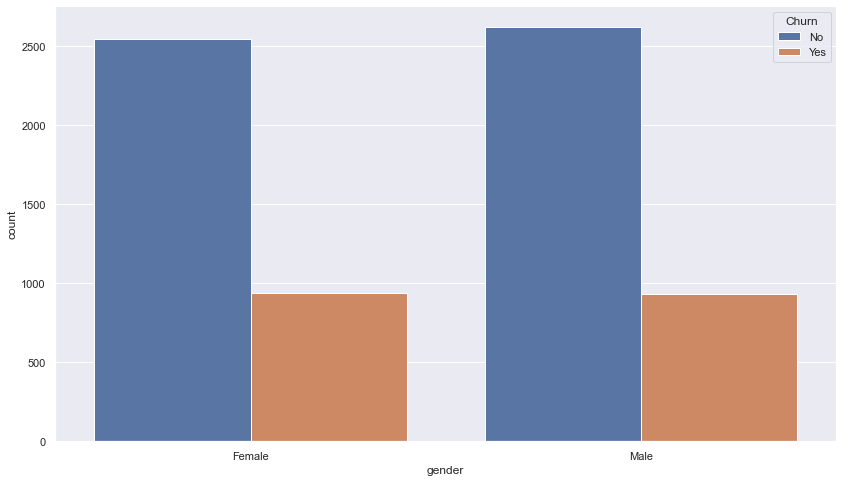

In [33]:
ax = sns.countplot(x = 'gender', data = df, hue = 'Churn')

In [34]:
churn_vs_gender = df.groupby('gender')["Churn"].value_counts(normalize=True)
print(churn_vs_gender)

gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: Churn, dtype: float64


    NX:
    Có thể thấy không có pattern nào đặc biệt ở đây, % khách hàng Nam/Nữ churn và % churn theo giới tính là xấp xỉ nhau

**SeniorCitizen**

In [35]:
get_label_counts(df['SeniorCitizen'])

,counts,percent (%)
class,,
No,5890,83.76
Yes,1142,16.24


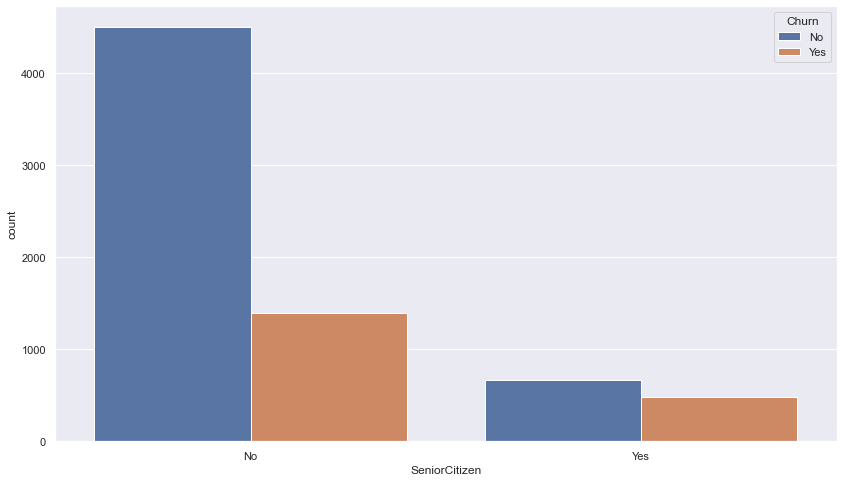

In [36]:
ax = sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn')

In [37]:
churn_vs_partner = df.groupby('SeniorCitizen')["Churn"].value_counts(normalize=True) #trong 2 group senior, % churn labels? = 'Churn percentage'
print(churn_vs_partner)

SeniorCitizen  Churn
No             No       0.763497
               Yes      0.236503
Yes            No       0.583187
               Yes      0.416813
Name: Churn, dtype: float64


    NX:
    Count thi < 65t nhieu hon, rate thi > 65t cao hon, nhưng cột này rất imbalanced nên không thể nói chắc chắn được

**Partner**

In [38]:
# Marial status distribution
get_label_counts(df['Partner'])

,counts,percent (%)
class,,
No,3639,51.75
Yes,3393,48.25


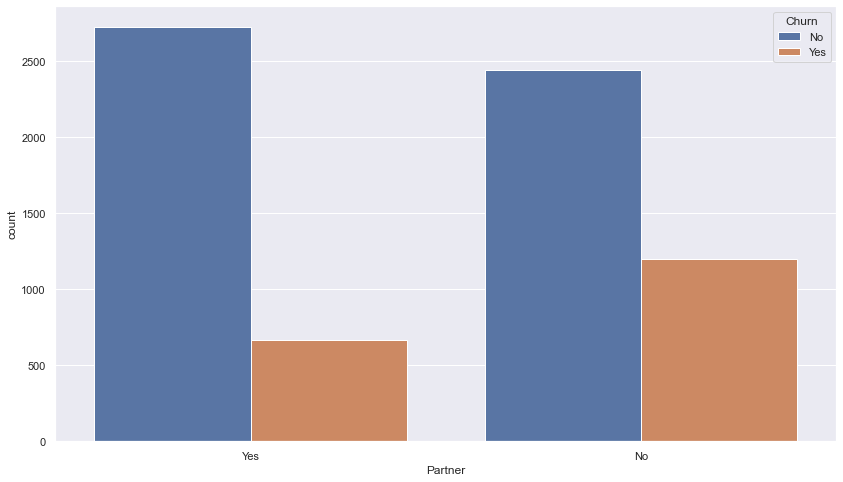

In [39]:
ax = sns.countplot(x = 'Partner', data = df, hue = 'Churn')

In [40]:
churn_vs_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True)
print(churn_vs_partner)

Partner  Churn
No       No       0.670239
         Yes      0.329761
Yes      No       0.802829
         Yes      0.197171
Name: Churn, dtype: float64


    NX:
    Khách hàng không có partner churn nhiều hơn những ng có (33% vs 20%)

**Dependents**

In [41]:
get_label_counts(df['Dependents'])

,counts,percent (%)
class,,
No,4933,70.15
Yes,2099,29.85


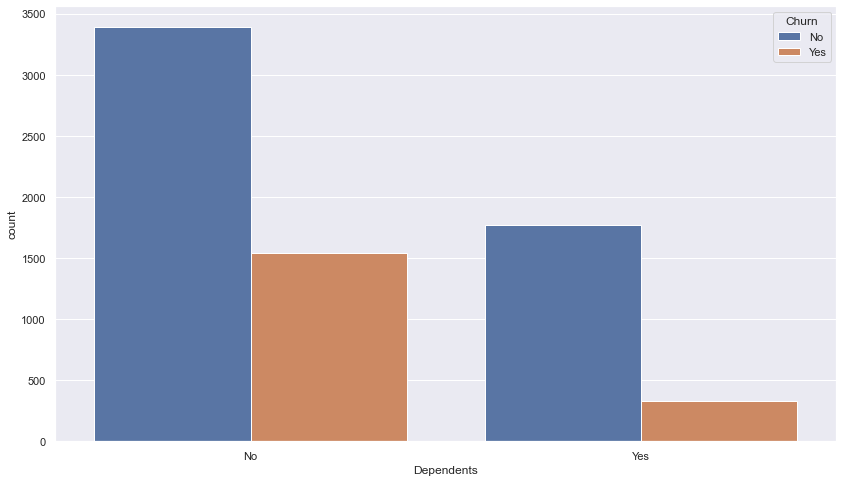

In [42]:
ax = sns.countplot(x = 'Dependents', data = df, hue = 'Churn')

In [43]:
churn_vs_dependent = df.groupby('Dependents')['Churn'].value_counts(normalize=True)
print(churn_vs_dependent)


Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.844688
            Yes      0.155312
Name: Churn, dtype: float64


    NX:
    Khách hàng không có Dependents churn nhiều hơn (31% vs 15%)

**Partner, Dependents**

In [44]:
partner_dependent = df.groupby(['Partner','Dependents'])['Churn'].value_counts(normalize=True)
print(partner_dependent)

Partner  Dependents  Churn
No       No          No       0.657622
                     Yes      0.342378
         Yes         No       0.785515
                     Yes      0.214485
Yes      No          No       0.745917
                     Yes      0.254083
         Yes         No       0.856897
                     Yes      0.143103
Name: Churn, dtype: float64


    NX: Vừa không có partner vừa không có dependent thì tỉ lệ churn cao nhất

<AxesSubplot:xlabel='Partner,Dependents,Churn'>

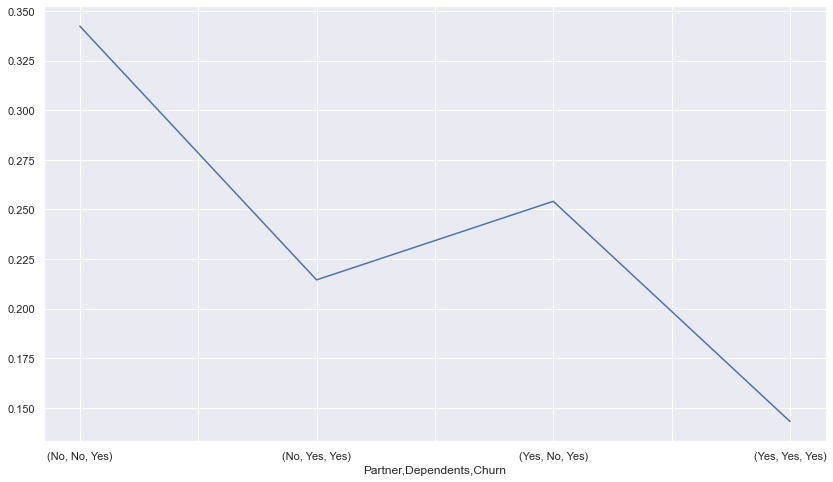

In [45]:
partner_dependent.iloc[[1,3,5,7]].plot()

**Dependent, Partner, senior**

In [46]:
partner_dependent_senior = df.groupby(['Partner','Dependents','SeniorCitizen'])['Churn'].value_counts(normalize=True)

partner_dependent_senior

Partner  Dependents  SeniorCitizen  Churn
No       No          No             No       0.688488
                                    Yes      0.311512
                     Yes            No       0.508021
                                    Yes      0.491979
         Yes         No             No       0.786325
                                    Yes      0.213675
                     Yes            No       0.750000
                                    Yes      0.250000
Yes      No          No             No       0.791917
                                    Yes      0.208083
                     Yes            No       0.636735
                                    Yes      0.363265
         Yes         No             No       0.861798
                                    Yes      0.138202
                     Yes            No       0.759036
                                    Yes      0.240964
Name: Churn, dtype: float64

    NX: Nhóm khách hàng "người già neo đơn" (no partner, no dependent, yes seniorcitizen) có tỉ lệ churn cao nhất, 49% :)))

<AxesSubplot:xlabel='Partner,Dependents,SeniorCitizen,Churn'>

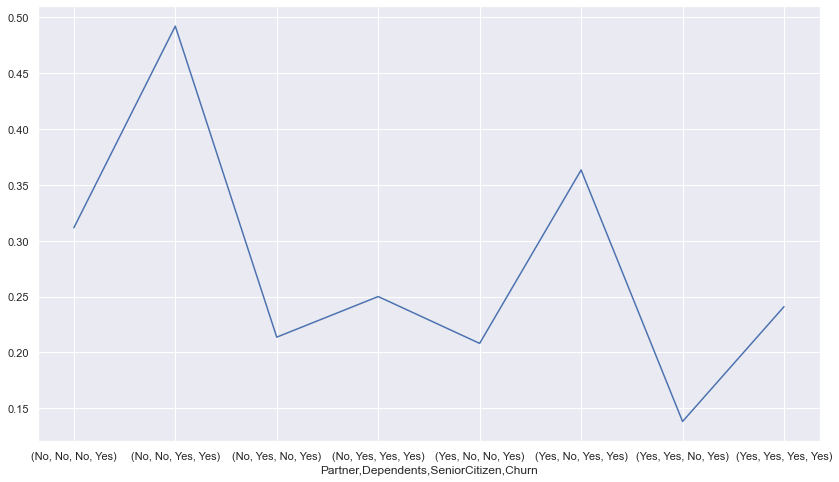

In [47]:
partner_dependent_senior.iloc[[1,3,5,7,9,11,13,15]].plot()

<AxesSubplot:xlabel='Partner,Dependents,SeniorCitizen,gender,Churn'>

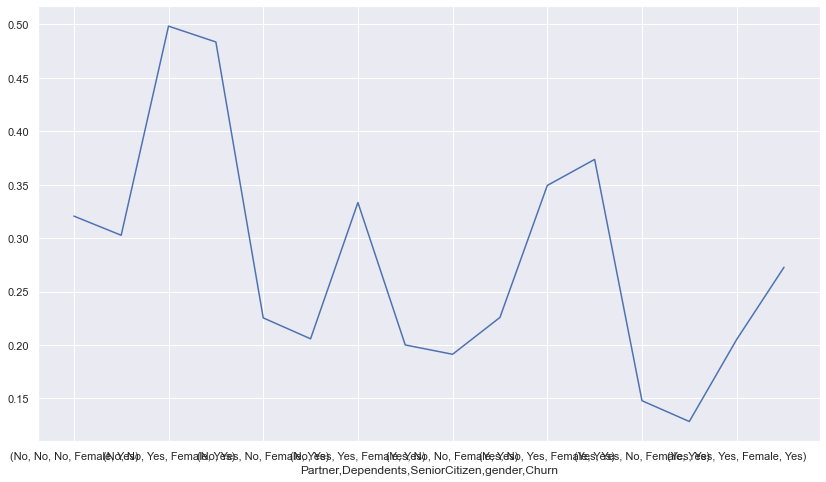

In [48]:
demographic = df.groupby(['Partner','Dependents','SeniorCitizen','gender'])['Churn'].value_counts(normalize=True)

demographic.iloc[[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]].plot()

    ?! Tại sao tỉ lệ của 3 cái trùng - yes Female, no Male không bằng nhau

### 2.3 Customer account information (contract, paperless billing option, payment method; tenure, MonthlyCharges, TotalCharge)
<br> included:

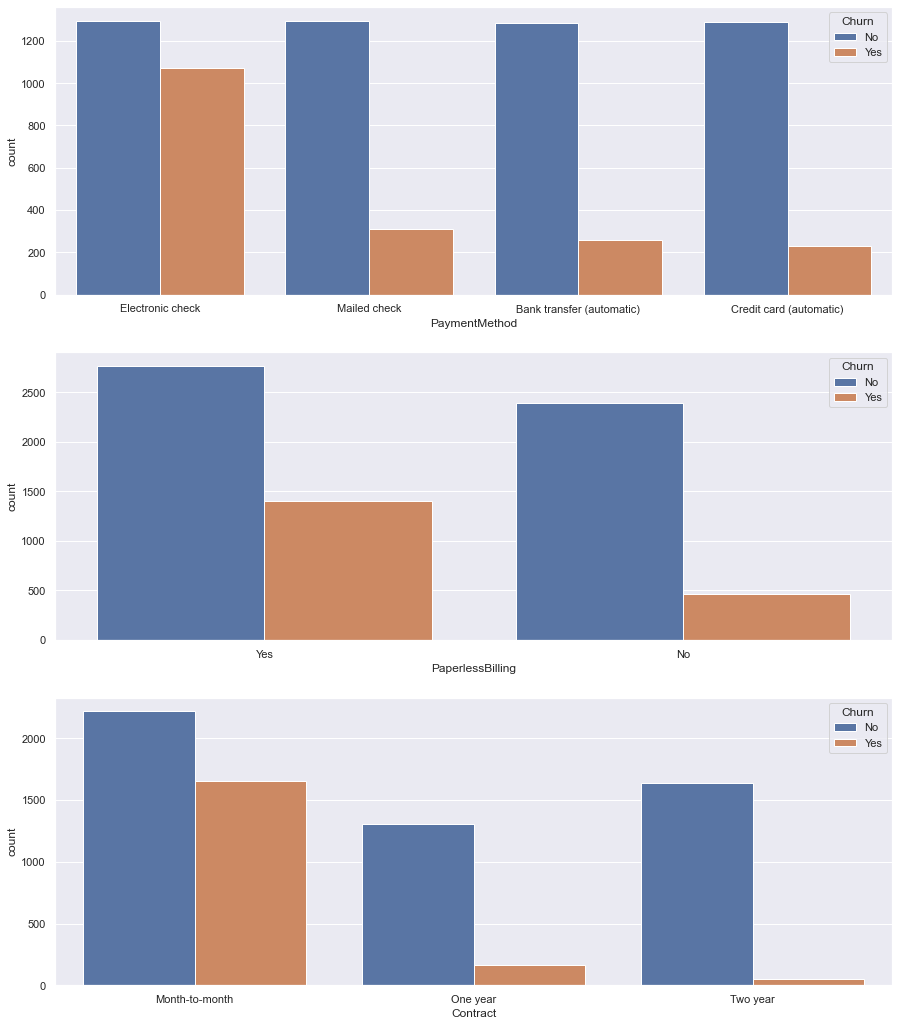

In [49]:
fig, axes = plt.subplots(nrows = 3,ncols = 1,figsize = (15,18))

ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn', ax = axes[0])
ax = sns.countplot(x = 'PaperlessBilling', data = df, hue = 'Churn', ax = axes[1])
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn', ax = axes[2])

(0.0, 0.5)

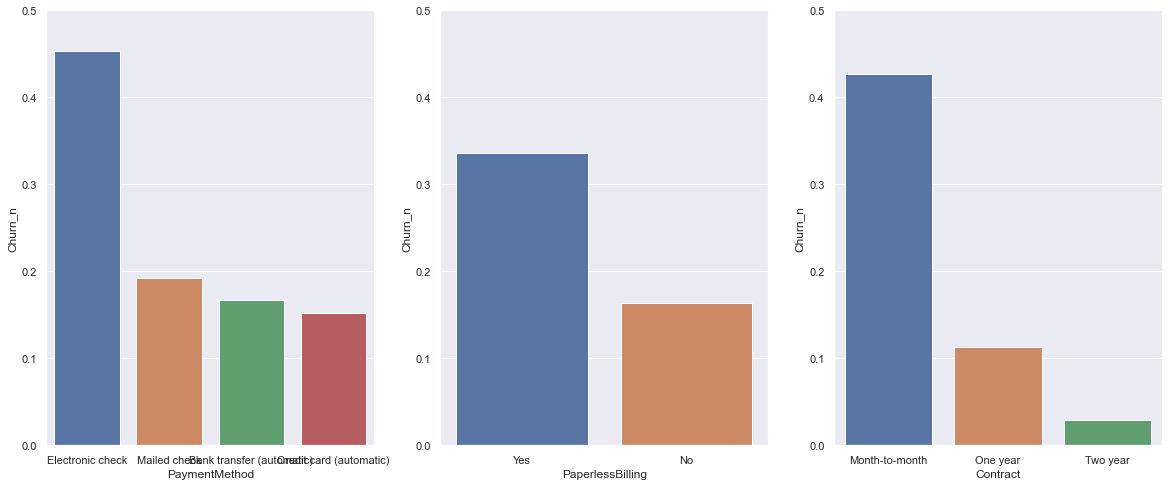

In [50]:
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (20,8))

ax = sns.barplot(x = 'PaymentMethod',  y = 'Churn_n', data = df, ax = axes[0], ci = None)
ax.set_ylim(0,0.5)
ax = sns.barplot(x = 'PaperlessBilling',  y = 'Churn_n', data = df, ax = axes[1], ci = None)
ax.set_ylim(0,0.5)
ax = sns.barplot(x = 'Contract',  y = 'Churn_n', data = df, ax = axes[2], ci = None)
ax.set_ylim(0,0.5)

**PaymentMethod**

In [51]:
get_label_counts(df['PaymentMethod'])

,counts,percent (%)
class,,
Electronic check,2365,33.63
Mailed check,1604,22.81
Bank transfer (automatic),1542,21.93
Credit card (automatic),1521,21.63


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

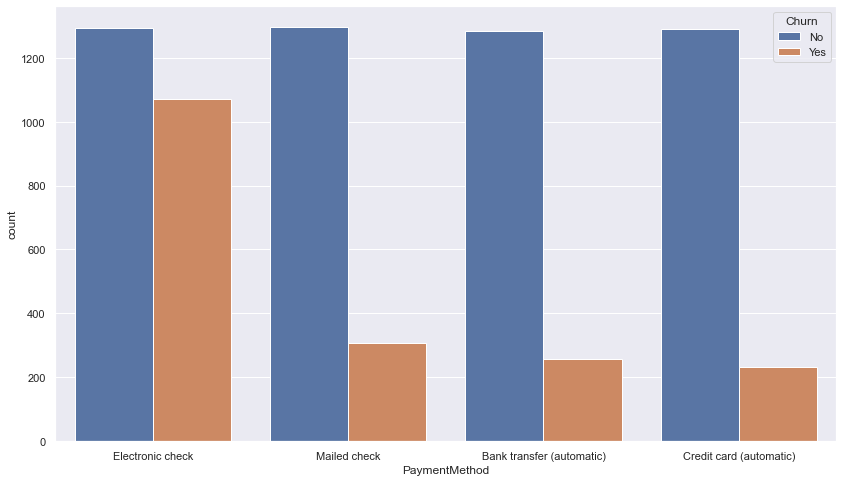

In [52]:
sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')

In [53]:
churn_vs_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
churn_vs_payment

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832685
                           Yes      0.167315
Credit card (automatic)    No       0.847469
                           Yes      0.152531
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.807980
                           Yes      0.192020
Name: Churn, dtype: float64

    NX:
    Trong những khách hàng đã churn, khách hàng dùng Electronic check chiếm nhiều % nhất. Trong khi đó, không có nhiều khác biệt giữa các PaymentMethod trong tập khách hàng không Churn. Vì vậy, nghi ngờ Electronic check là một yếu tố ảnh hưởng nhiều đến churn.

***Hypothesis Testing: khach hang dung electronic check co churn rate cao hon cac khach hang khac***

https://sonalake.com/latest/hypothesis-testing-of-proportion-based-samples/

In [54]:
# 1 - Extract churned customer that chose electronic check
churn_echeck = df[(df['PaymentMethod'] == "Electronic check")]
churn_echeck[['customerID','PaymentMethod','Churn']]

,customerID,PaymentMethod,Churn
0,7590-VHVEG,Electronic check,No
4,9237-HQITU,Electronic check,Yes
5,9305-CDSKC,Electronic check,Yes
8,7892-POOKP,Electronic check,Yes
14,5129-JLPIS,Electronic check,No
...,...,...,...
7023,1035-IPQPU,Electronic check,No
7029,2235-DWLJU,Electronic check,No
7032,6894-LFHLY,Electronic check,Yes
7036,7750-EYXWZ,Electronic check,No


In [55]:
# 2 - Extract churned customer didn't choose electronic check as their payment method
churn_nonecheck = df[(df['PaymentMethod'] != "Electronic check")][['customerID','PaymentMethod','Churn']]
churn_nonecheck

,customerID,PaymentMethod,Churn
1,5575-GNVDE,Mailed check,No
2,3668-QPYBK,Mailed check,Yes
3,7795-CFOCW,Bank transfer (automatic),No
6,1452-KIOVK,Credit card (automatic),No
7,6713-OKOMC,Mailed check,No
...,...,...,...
7037,2569-WGERO,Bank transfer (automatic),No
7038,6840-RESVB,Mailed check,No
7039,2234-XADUH,Credit card (automatic),No
7041,8361-LTMKD,Mailed check,Yes


In [56]:
len(churn_echeck[churn_echeck['Churn'] == 'Yes'])/len(churn_echeck)

0.4528541226215645

In [57]:
# 3 - Store data for testing into variables
yes_echeck, size_echeck = (len(churn_echeck[churn_echeck['Churn'] == 'Yes']), len(churn_echeck))
yes_nonecheck, size_nonecheck = (len(churn_nonecheck[churn_nonecheck['Churn'] == 'Yes']), len(churn_nonecheck))

churn_count = np.array([yes_echeck, yes_nonecheck])
sample_size = np.array([size_echeck, size_nonecheck])

print(churn_count)
print(sample_size)

[1071  798]
[2365 4667]


In [58]:
# 4 - Apply --- for 2 proportion, not knowing population variance
# Independent sample -> ztest
# Hypothesis (greater): 
#     H0: Churn rate echeck (= Churn/Total echeck) = Churn rate nonecheck
#     Ha: Churn rate echeck > Mu Churn rate nonecheck

from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=churn_count, nobs=sample_size,  alternative='larger')

(25.279087953781392, 2.7125235740320553e-141)

p = 2.713 * 10^-141 <<< alpha = 0.05 => Reject H0

**Contract**

In [59]:
get_label_counts(df['Contract'])

,counts,percent (%)
class,,
Month-to-month,3875,55.11
Two year,1685,23.96
One year,1472,20.93


<AxesSubplot:xlabel='Contract', ylabel='count'>

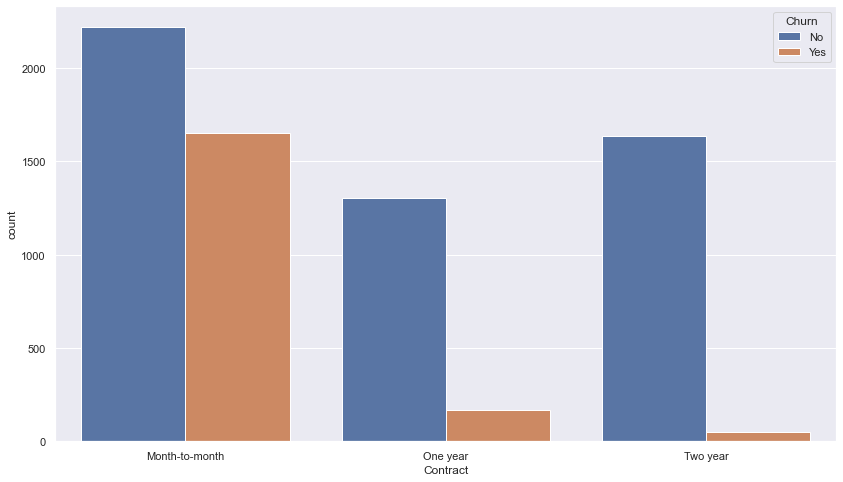

In [60]:
sns.countplot(x = 'Contract', data = df, hue = 'Churn')

In [61]:
churn_vs_contract= df.groupby('Contract')["Churn"].value_counts(normalize=True)
print(churn_vs_contract)

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: Churn, dtype: float64


    NX
    - Với khách hàng churn: theo thứ tự m2m, 1y, 2y. Trong đó, m2m chênh lệch rất lớn với 2 cái còn lại.
    - Với khách hàng không churn: theo thứ tự m2m, 2y, 1y.
    -> Do khách hàng trả tiền theo tháng thì dễ dàng cắt dịch vụ khi hết tháng hơn? Nên tập trung để giữ chân họ?
    -> Khách hàng kí hợp đồng theo chu kỳ 2 năm "trung thành" với dịch vụ hơn

In [62]:
# 1 - Extract churned customer that chose electronic check
m2m_contract = df[(df['Contract'] == "Month-to-month")][['customerID','PaymentMethod','Churn']]
other_contract = df[(df['Contract'] != "Month-to-month")][['customerID','PaymentMethod','Churn']]

In [63]:
# 2 - Store data for testing into variables
yes_m2m, size_m2m = (len(m2m_contract[m2m_contract['Churn'] == 'Yes']), len(m2m_contract))
yes_other, size_other = (len(other_contract[other_contract['Churn'] == 'Yes']), len(other_contract))

churn_count = np.array([yes_m2m, yes_other])
sample_size = np.array([size_m2m, size_other])

print(churn_count)
print(sample_size)

[1655  214]
[3875 3157]


In [64]:
len(m2m_contract[m2m_contract['Churn'] == 'Yes'])/len(m2m_contract)

0.4270967741935484

In [65]:
# 3 - Apply --- for 2 proportion, not knowing population variance
# Independent sample -> ztest
# Hypothesis (greater): 
#     H0: Churn rate echeck (= Churn/Total echeck) = Churn rate nonecheck
#     Ha: Churn rate echeck > Mu Churn rate nonecheck

from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=churn_count, nobs=sample_size,  alternative='larger')

(33.92557804169975, 1.3980046262936563e-252)

**PaperlessBilling**

In [66]:
get_label_counts(df['PaperlessBilling'])

,counts,percent (%)
class,,
Yes,4168,59.27
No,2864,40.73


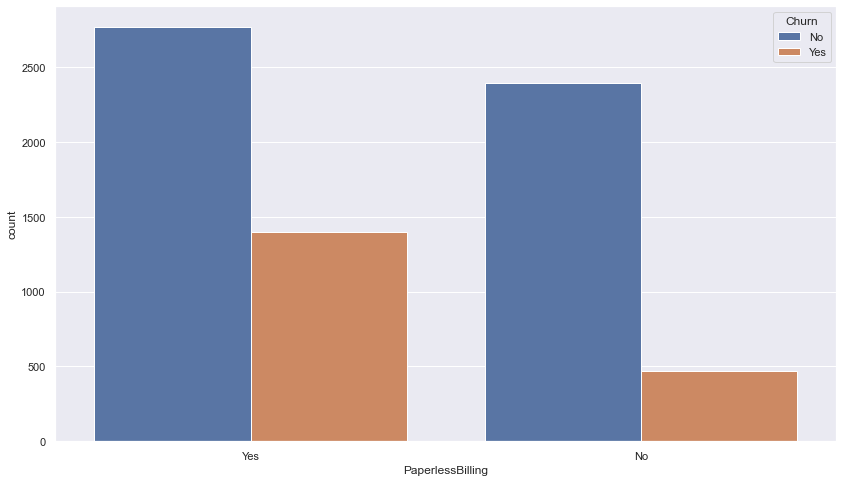

In [67]:
ax = sns.countplot(x = 'PaperlessBilling', data = df, hue = 'Churn')

In [68]:
churn_vs_pplbill= df.groupby('PaperlessBilling')["Churn"].value_counts(normalize=True)
print(churn_vs_pplbill)

PaperlessBilling  Churn
No                No       0.836243
                  Yes      0.163757
Yes               No       0.664107
                  Yes      0.335893
Name: Churn, dtype: float64


    NX:
    Tỉ lệ churn của khách hàng có sử dụng dịch vụ không hóa đơn lớn hơn (33% so với 16%). Có thể dịch vụ hóa đơn này có vấn đề.

**Contract - Payment**

In [69]:
contract_payment = df.groupby(['Contract','PaymentMethod'])["Churn"].value_counts(normalize=True)
contract_payment 

Contract        PaymentMethod              Churn
Month-to-month  Bank transfer (automatic)  No       0.658744
                                           Yes      0.341256
                Credit card (automatic)    No       0.672192
                                           Yes      0.327808
                Electronic check           Yes      0.537297
                                           No       0.462703
                Mailed check               No       0.684211
                                           Yes      0.315789
One year        Bank transfer (automatic)  No       0.902813
                                           Yes      0.097187
                Credit card (automatic)    No       0.896985
                                           Yes      0.103015
                Electronic check           No       0.815562
                                           Yes      0.184438
                Mailed check               No       0.931548
                                    

In [70]:
df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & df.Churn_n == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_n
268,6323-AYBRX,Male,No,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.60,Yes,1
5947,7951-QKZPL,Female,No,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.30,Yes,1
6680,9412-ARGBX,Female,No,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes,1


    NX:
    - Người dùng hợp đồng hàng tháng + electronic check có tỉ lệ churn cao nhất: 54%
    - Người dùng kí hợp đồng hàng năm + mail gần như không churn (Chỉ có 3 người)

**Contract - PaperlessBilling**

In [71]:
contract_pplbill = df.groupby(['Contract','PaperlessBilling'])["Churn"].value_counts(normalize=True)
contract_pplbill

Contract        PaperlessBilling  Churn
Month-to-month  No                No       0.685027
                                  Yes      0.314973
                Yes               No       0.517015
                                  Yes      0.482985
One year        No                No       0.928678
                                  Yes      0.071322
                Yes               No       0.852315
                                  Yes      0.147685
Two year        No                No       0.983370
                                  Yes      0.016630
                Yes               No       0.957854
                                  Yes      0.042146
Name: Churn, dtype: float64

    NX:
    Người dùng hợp đồng theo tháng và dùng thanh toán không hóa đơn có tỉ lệ churn cao 48%    

**PaperlessBilling - Payment**

In [72]:
payment_pplbill = df.groupby(['PaymentMethod','PaperlessBilling'])["Churn"].value_counts(normalize=True)
payment_pplbill

PaymentMethod              PaperlessBilling  Churn
Bank transfer (automatic)  No                No       0.889740
                                             Yes      0.110260
                           Yes               No       0.790776
                                             Yes      0.209224
Credit card (automatic)    No                No       0.899844
                                             Yes      0.100156
                           Yes               No       0.809524
                                             Yes      0.190476
Electronic check           No                No       0.672552
                                             Yes      0.327448
                           Yes               No       0.502296
                                             Yes      0.497704
Mailed check               No                No       0.864067
                                             Yes      0.135933
                           Yes               No       0.726718
    

    NX:
    Người dùng thanh toán bằng electronic check và dùng thanh toán không hóa đơn có tỉ lệ churn cao 49%    

**Contract - Payment - PaperlessBilling**

In [73]:
cus_info_cate = df.groupby(['Contract','PaymentMethod','PaperlessBilling'])["Churn"].value_counts(normalize=True).sort_values(ascending=False)
cus_info_cate

Contract        PaymentMethod              PaperlessBilling  Churn
Two year        Mailed check               No                No       0.996241
                                           Yes               No       0.981651
                Credit card (automatic)    No                No       0.980263
                Bank transfer (automatic)  No                No       0.978261
                Credit card (automatic)    Yes               No       0.974638
                Electronic check           No                No       0.964286
                Bank transfer (automatic)  Yes               No       0.954545
One year        Mailed check               No                No       0.953271
                Bank transfer (automatic)  No                No       0.935673
                Credit card (automatic)    No                No       0.925287
Two year        Electronic check           Yes               No       0.901786
One year        Mailed check               Yes               No 

    NX:
    Khách hàng có tổ hợp đặc điểm: month-to-month, electronic check, paperlessbilling có tỉ lệ churn lên đến 58%, cao hơn gấp đôi mức 27% của toàn tập dữ liệu khách hàng.



---

**Tenure**

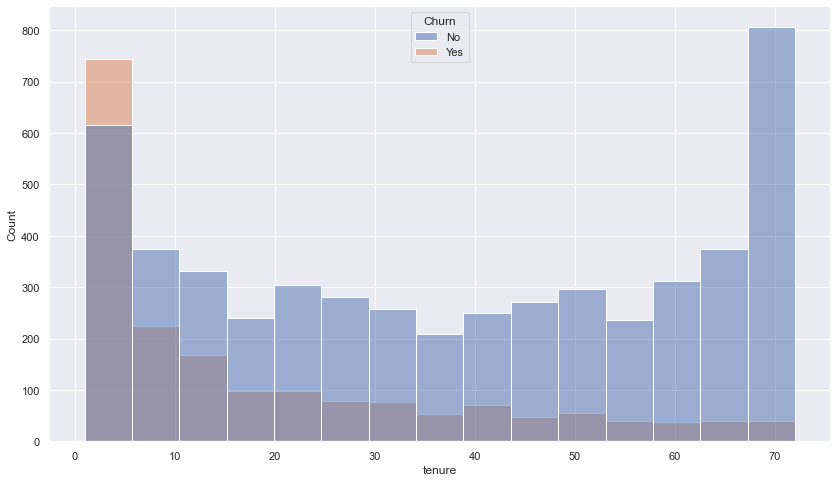

In [74]:
ax = sns.histplot(x = 'tenure', data = df, hue = 'Churn')

<AxesSubplot:xlabel='tenure', ylabel='Density'>

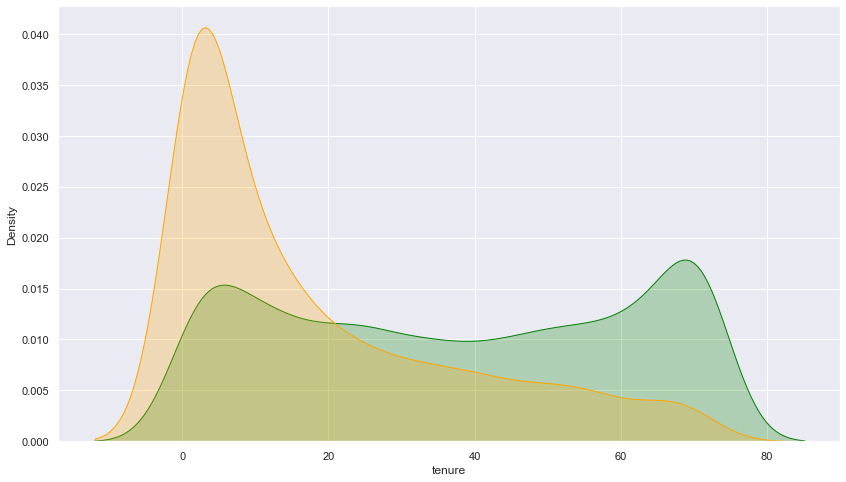

In [75]:
sns.kdeplot(df.loc[(df['Churn_n'] == 0), 'tenure'], shade = True, color = 'green') 
sns.kdeplot(df.loc[(df['Churn_n'] == 1), 'tenure'], shade = True, color = 'orange')


C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

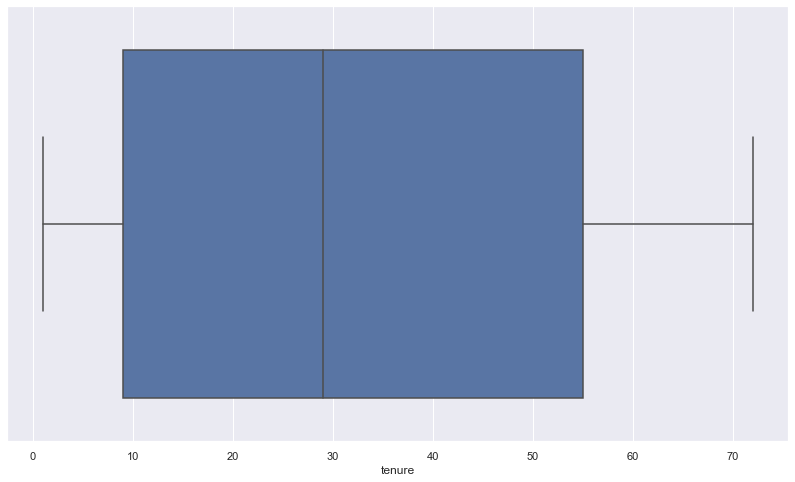

In [76]:
sns.boxplot(df['tenure'])

In [77]:
# Detect outliers using z-sore > 3

x = df['tenure']
mu = x.mean()
sigma = x.std()
z_score = (x-mu)/sigma

df[abs(z_score) > 3].shape # How many outliers?

(0, 22)

In [78]:
print(df.groupby(by=['Churn'])['tenure'].mean())

Churn
No     37.650010
Yes    17.979133
Name: tenure, dtype: float64


    NX:
    - Phân phối churn theo tenure lệch trái: Khoảng thời gian đầu, khách hàng churn rất nhiều -> Dịch vụ đang không thành công trong việc giữ chân khách hàng?
    - Phân phối không churn có 2 đỉnh: Mức 50-60 tháng có thể chứa cột mốc cho việc khách hàng có ở lại lâu dài hoặc là tại đó mình thu đc ít dữ liệu
    - tenure trung bình: Churn - 18, Không - 37

**MonthlyCharges**

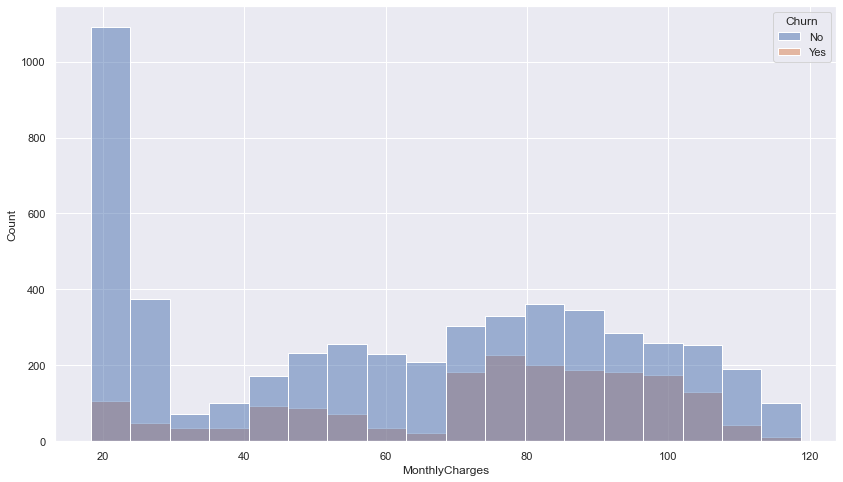

In [79]:
ax = sns.histplot(x = 'MonthlyCharges', data = df, hue = 'Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

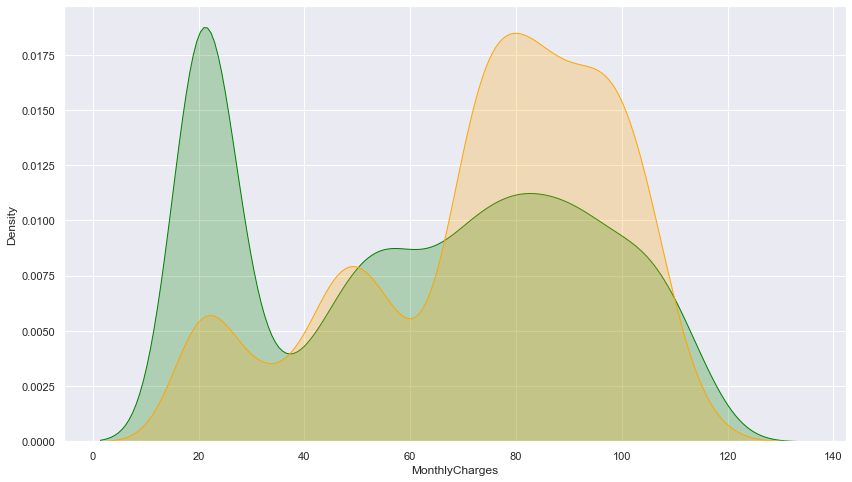

In [80]:
sns.kdeplot(df.loc[(df['Churn_n'] == 0), 'MonthlyCharges'], shade = True, color = 'green') 
sns.kdeplot(df.loc[(df['Churn_n'] == 1), 'MonthlyCharges'], shade = True, color = 'orange')

In [81]:
df[(df['MonthlyCharges'] == 50) ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_n
1544,3794-NFNCH,Male,No,Yes,No,30,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.0,1474.90,No,0
2554,5843-TTHGI,Female,No,No,No,18,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.0,892.70,No,0
2889,9830-ECLEN,Male,No,Yes,Yes,58,No,No phone service,DSL,Yes,...,No,Yes,No,One year,No,Mailed check,50.0,2919.85,No,0
3620,9373-WSLOY,Male,Yes,Yes,No,33,No,No phone service,DSL,No,...,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.0,1750.85,No,0
5337,6705-LNMDD,Male,No,No,No,20,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,No,Mailed check,50.0,1003.05,No,0


C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

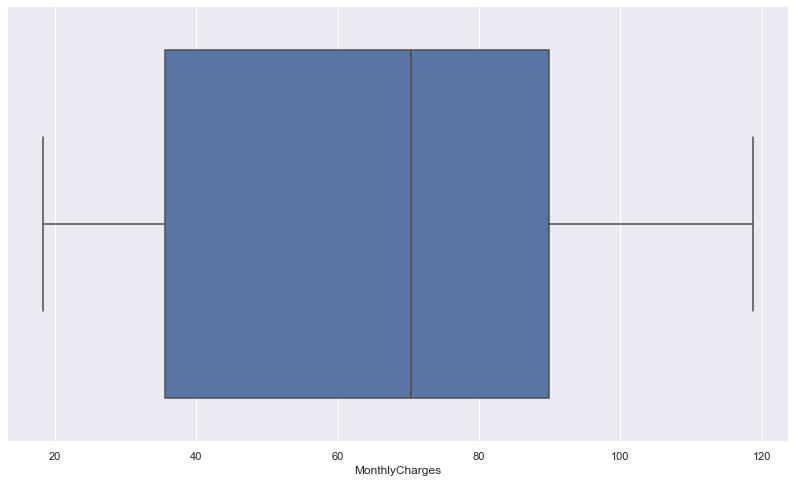

In [82]:
sns.boxplot(df['MonthlyCharges'])

In [83]:
# Detect outliers using z-sore > 3

x = df['MonthlyCharges']
mu = x.mean()
sigma = x.std()
z_score = (x-mu)/sigma

df[abs(z_score) > 3].shape # How many outliers?

(0, 22)

In [84]:
print(df.groupby(by=['Churn'])['MonthlyCharges'].mean())

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64


    NX:
    - Phân phối không Churn có 1 đỉnh: trả ít tiền gần như free
    - Phân phối Churn có 2 đỉnh phụ (không biết vì sao? -.-), tập trung nhiều vào khoảng > 60 
    - Monthly Charges trung bình:
        + Churn: 74
        + Không: 61
    

**TotalCharges**

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


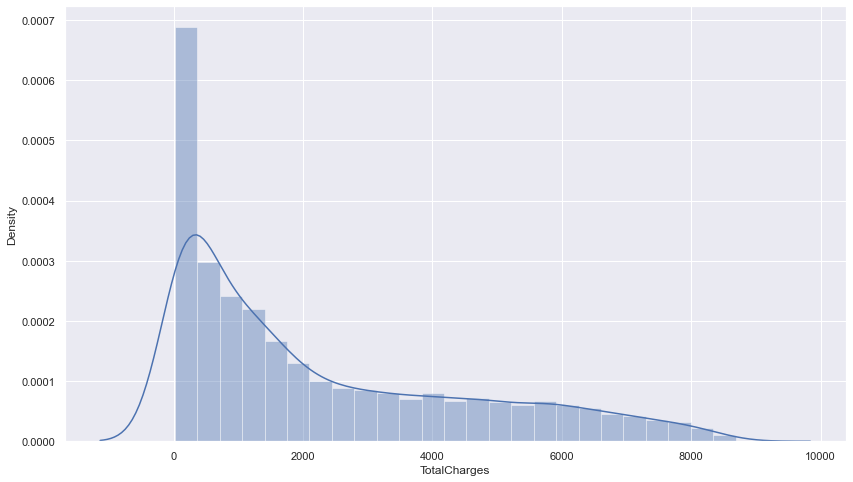

In [85]:
ax = sns.distplot(df['TotalCharges'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

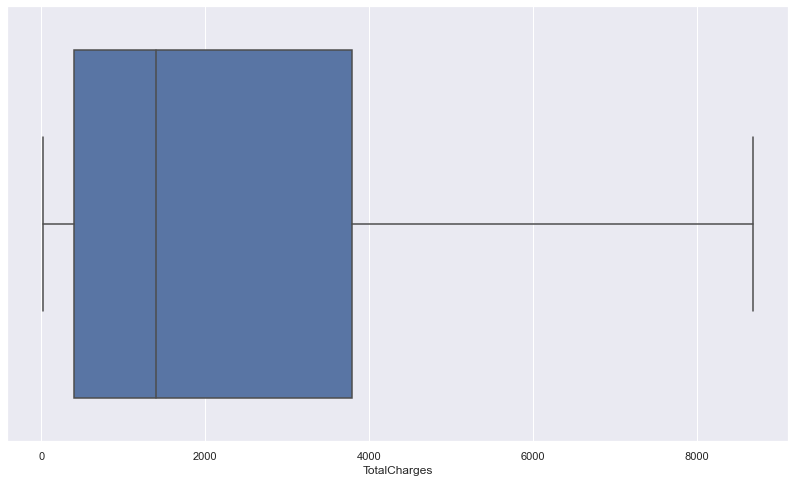

In [86]:
sns.boxplot(df['TotalCharges'])

In [87]:
# Detect outliers using z-sore > 3

x = df['TotalCharges']
mu = x.mean()
sigma = x.std()
z_score = (x-mu)/sigma

df[abs(z_score) > 3].shape # How many outliers?

(0, 22)

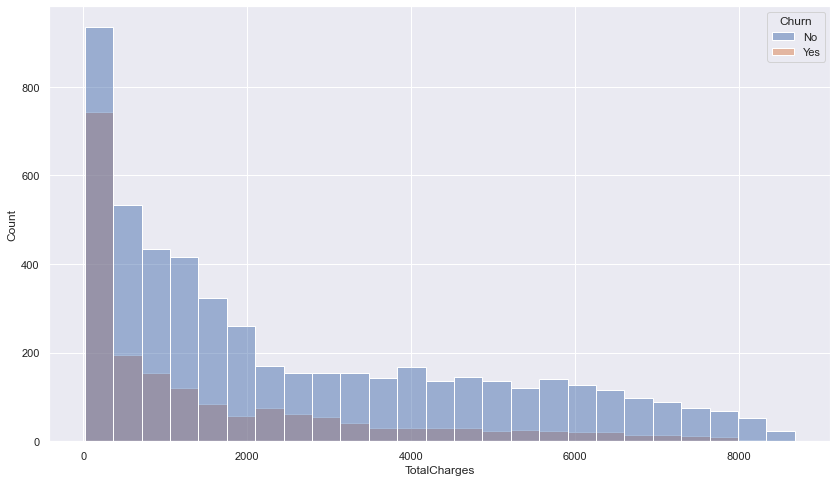

In [88]:
ax = sns.histplot(x = 'TotalCharges', data = df, hue = 'Churn')

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

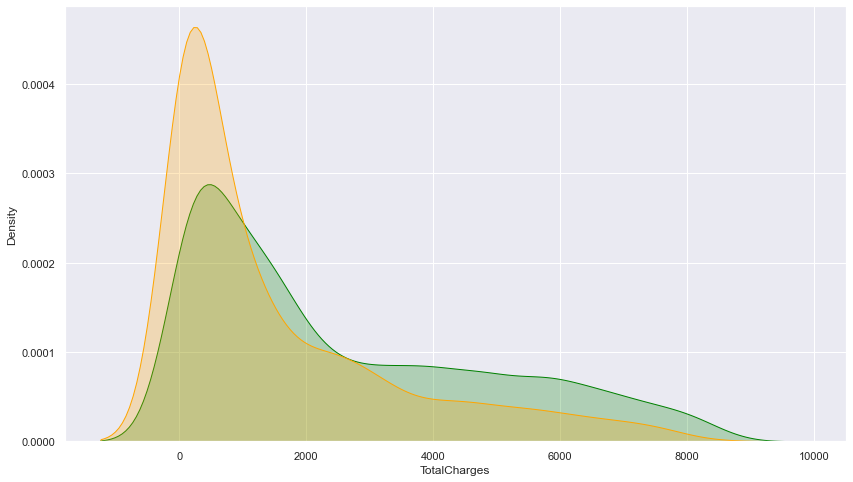

In [89]:
sns.kdeplot(df.loc[(df['Churn_n'] == 0), 'TotalCharges'], shade = True, color = 'green') 
sns.kdeplot(df.loc[(df['Churn_n'] == 1), 'TotalCharges'], shade = True, color = 'orange')

In [90]:
print(df.groupby(by='Churn')[['TotalCharges','tenure']].mean())

       TotalCharges     tenure
Churn                         
No      2555.344141  37.650010
Yes     1531.796094  17.979133


    NX:
    - Phân phối của khách hàng Churn và không Churn có hình dạng giống nhau
    - TotalCharges trung bình, khách hàng không churn trả trung bình nhiều hơn vì họ đã ở lại thôi:
        + Churn: 1531
        + Không: 2555

### 2.4 Services (9 types)

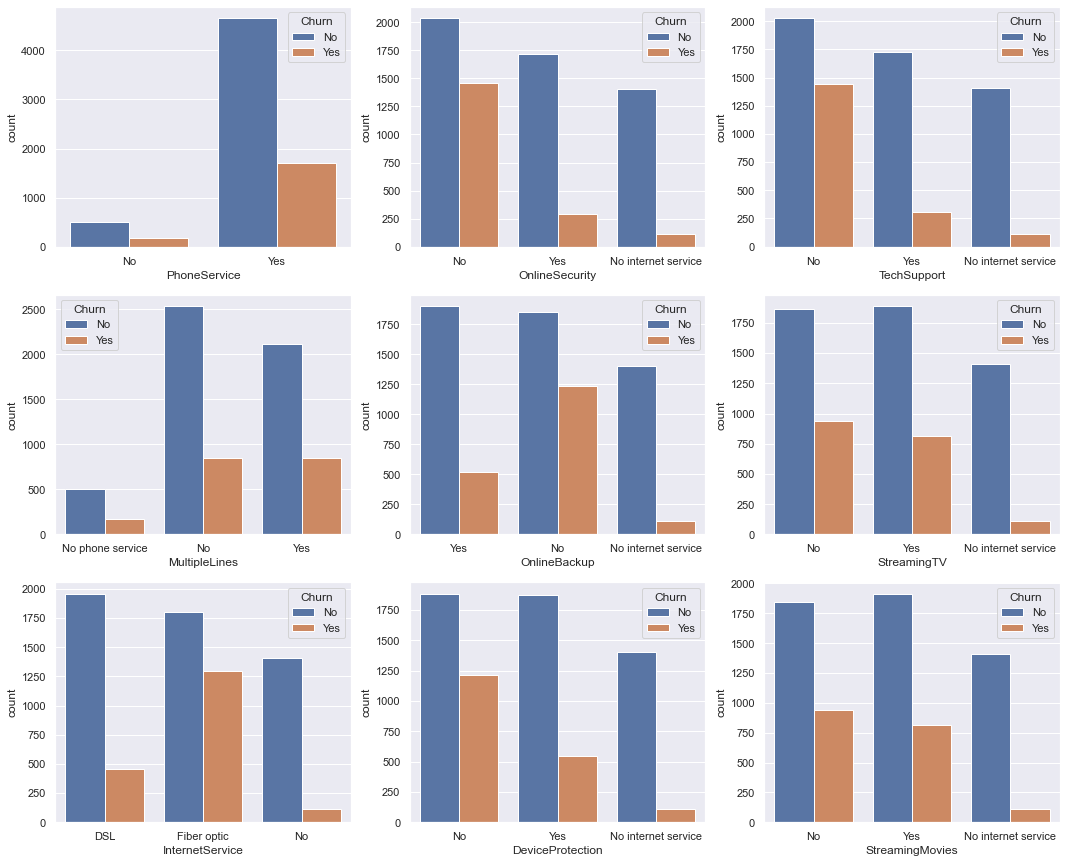

In [91]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
           
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (18,15))
for i, item in enumerate(services):
    if i < 3:
        ax = sns.countplot(x = item, data = df, hue = 'Churn', ax=axes[i,0])
        
    elif i >=3 and i < 6:
        ax = sns.countplot(x = item, data = df, hue = 'Churn', ax=axes[i-3,1])
        
    elif i < 9:
        ax = sns.countplot(x = item, data = df, hue = 'Churn', ax=axes[i-6,2])

In [92]:
df[df['OnlineSecurity'] == 'No internet service'].shape

(1520, 22)

In [93]:
df[df['MultipleLines'] == 'No phone service'].shape

(680, 22)

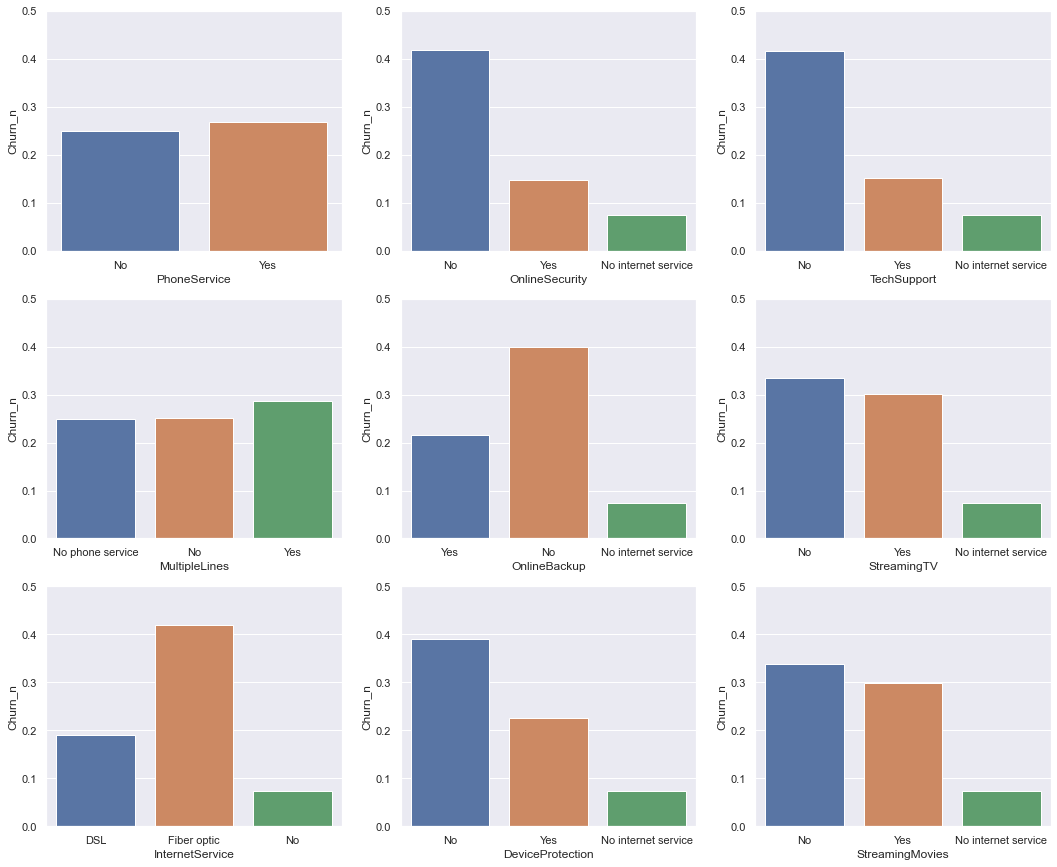

In [94]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (18,15))
for i, item in enumerate(services):
    if i < 3:
        ax = sns.barplot(x = item, y = 'Churn_n', data = df, ax=axes[i,0], ci = None)
    elif i >=3 and i < 6:
        ax = sns.barplot(x = item, y = 'Churn_n', data = df, ax=axes[i-3,1],ci = None)
    elif i < 9:
        ax = sns.barplot(x = item, y = 'Churn_n', data = df, ax=axes[i-6,2], ci = None)
    ax.set_ylim(0,0.5)

**PhoneService**

In [95]:
phone_serv = df.groupby('PhoneService')["Churn"].value_counts(normalize=True)
print(phone_serv)

PhoneService  Churn
No            No       0.750000
              Yes      0.250000
Yes           No       0.732525
              Yes      0.267475
Name: Churn, dtype: float64


    NX: Không có sự khác biệt lớn trong tỉ lệ churn giữa người có và không dùng dịch vụ điện thoại

**Internet Services**

In [96]:
net_serv = df.groupby('InternetService')["Churn"].value_counts(normalize=True)
print(net_serv)

InternetService  Churn
DSL              No       0.810017
                 Yes      0.189983
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925658
                 Yes      0.074342
Name: Churn, dtype: float64


    NX: Người dùng Fiber optic có tỉ lệ churn cao. Do dịch vụ này ?
    - Giá hàng tháng cao (confirmed)
    - Quality: chưa có data -> next step: khảo sát,... bổ sung data

In [97]:
df.groupby('InternetService')['MonthlyCharges'].mean()

InternetService
DSL            58.088017
Fiber optic    91.500129
No             21.076283
Name: MonthlyCharges, dtype: float64

***Hypothesis Testing: Fiber optic user churn more***

In [98]:
# 1 - Extract churned customer that chose electronic check
fiber_optic = df[(df['InternetService'] == "Fiber optic")][['customerID','PaymentMethod','Churn']]
other_service = df[(df['InternetService'] != "Fiber optic")][['customerID','PaymentMethod','Churn']]

In [99]:
# 3 - Store data for testing into variables
yes_fiberoptic, size_fiberoptic = (len(fiber_optic[fiber_optic['Churn'] == 'Yes']), len(fiber_optic))
yes_other, size_other = (len(other_service[other_service['Churn'] == 'Yes']), len(other_service))

churn_count = np.array([yes_fiberoptic, yes_other])
sample_size = np.array([size_fiberoptic, size_other])

print(churn_count)
print(sample_size)

[1297  572]
[3096 3936]


In [100]:
len(fiber_optic[fiber_optic['Churn'] == 'Yes'])/len(fiber_optic)

0.4189276485788114

In [101]:
# 4 - Apply --- for 2 proportion, not knowing population variance
# Independent sample -> ztest
# Hypothesis (greater): 
#     H0: Churn rate echeck (= Churn/Total echeck) = Churn rate nonecheck
#     Ha: Churn rate echeck > Mu Churn rate nonecheck

from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=churn_count, nobs=sample_size,  alternative='larger')

(25.782896978062105, 6.896208655932962e-147)

p = 6.90 * 10^-147 <<< alpha = 0.05 => Reject H0

**Các cột Yes dịch vụ net mà churn rate cao: StreamingTV, StreamingMovies**
    
    - Họ có xài cái tự dưng họ churn? -> check giá thử

In [102]:
df.groupby('StreamingTV')['Churn'].value_counts(normalize = True)

StreamingTV          Churn
No                   No       0.664649
                     Yes      0.335351
No internet service  No       0.925658
                     Yes      0.074342
Yes                  No       0.698853
                     Yes      0.301147
Name: Churn, dtype: float64

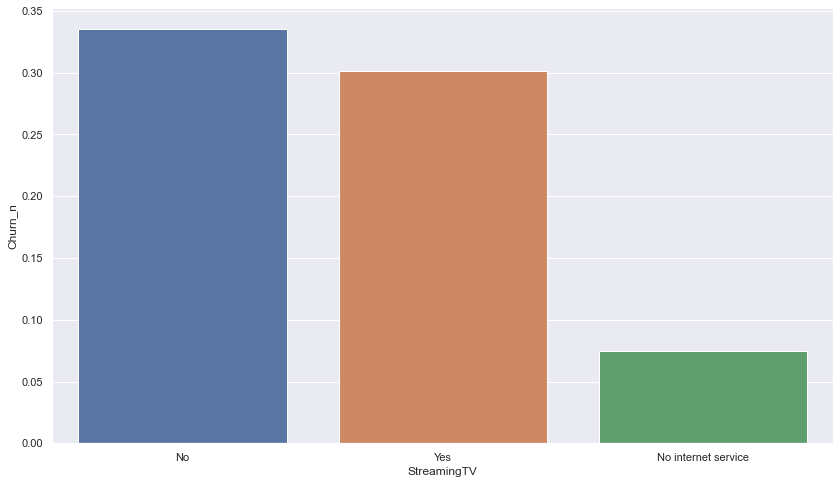

In [103]:
ax = sns.barplot(x = 'StreamingTV', y = 'Churn_n', data = df, ci = None)

In [104]:
df.groupby('StreamingTV')['MonthlyCharges'].mean()

StreamingTV
No                     65.388928
No internet service    21.076283
Yes                    88.770829
Name: MonthlyCharges, dtype: float64

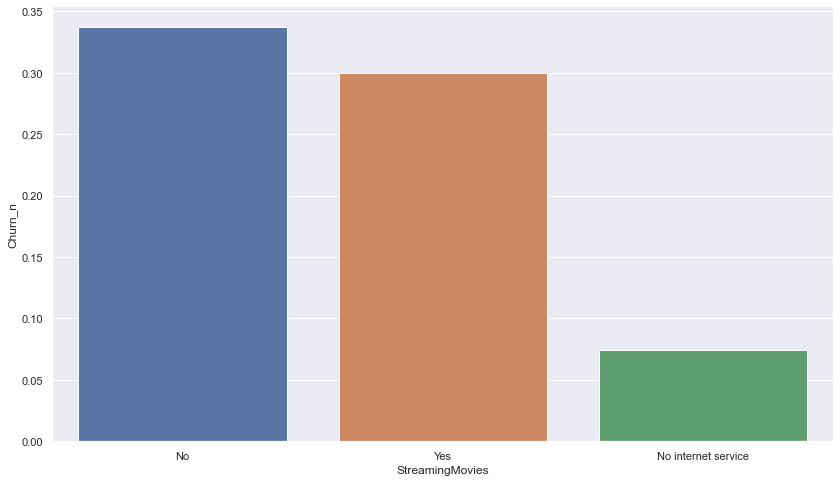

In [105]:
ax = sns.barplot(x = 'StreamingMovies', y = 'Churn_n', data = df, ci = None)

In [106]:
df.groupby('StreamingMovies')['Churn'].value_counts(normalize = True)

StreamingMovies      Churn
No                   No       0.662711
                     Yes      0.337289
No internet service  No       0.925658
                     Yes      0.074342
Yes                  No       0.700476
                     Yes      0.299524
Name: Churn, dtype: float64

In [107]:
df.groupby('StreamingMovies')['MonthlyCharges'].mean()

StreamingMovies
No                     65.440579
No internet service    21.076283
Yes                    88.478506
Name: MonthlyCharges, dtype: float64

    Chênh lệch về giá không lớn như trường hợp Fiber optic, có thể giá không phải nguyên nhân chính

***Các cột No dịch vụ net mà churn rate cao: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport***

In [108]:
print(df.groupby('OnlineSecurity')['MonthlyCharges'].mean())
print(df.groupby('OnlineBackup')['MonthlyCharges'].mean())
print(df.groupby('DeviceProtection')['MonthlyCharges'].mean())
print(df.groupby('TechSupport')['MonthlyCharges'].mean())

OnlineSecurity
No                     75.693737
No internet service    21.076283
Yes                    78.870496
Name: MonthlyCharges, dtype: float64
OnlineBackup
No                     71.944282
No internet service    21.076283
Yes                    83.106412
Name: MonthlyCharges, dtype: float64
DeviceProtection
No                     70.603862
No internet service    21.076283
Yes                    84.853888
Name: MonthlyCharges, dtype: float64
TechSupport
No                     74.584879
No internet service    21.076283
Yes                    80.718799
Name: MonthlyCharges, dtype: float64


    NX:
    Họ không xài cũng churn nên không thể nói chất lượng của bản thân cái dịch vụ này làm họ churn
    Giá cả lại không chênh quá nhiều (giá không hẳn là rào cản chính trong việc họ có chọn thêm dịch vụ này hay không)
    => Có thể:
    - Trải nghiệm của họ không tốt vì không có những dịch vụ này: tìm cách sale cho họ dịch vụ
    - Có các biến khác ảnh hưởng
    


In [109]:
# Online Security, TechSupport churn rate > 40%
print(df.groupby('PaymentMethod')['OnlineSecurity'].value_counts(normalize=True))
print(df.groupby('PaymentMethod')['TechSupport'].value_counts(normalize=True))

PaymentMethod              OnlineSecurity     
Bank transfer (automatic)  No                     0.417639
                           Yes                    0.367056
                           No internet service    0.215305
Credit card (automatic)    No                     0.396450
                           Yes                    0.385930
                           No internet service    0.217620
Electronic check           No                     0.733192
                           Yes                    0.215222
                           No internet service    0.051586
Mailed check               No internet service    0.458229
                           No                     0.321696
                           Yes                    0.220075
Name: OnlineSecurity, dtype: float64
PaymentMethod              TechSupport        
Bank transfer (automatic)  No                     0.408560
                           Yes                    0.376135
                           No internet serv

    Hmm, có đến 73% trong những người dùng Electronic check (có churn rate cao) là không dùng OnlineSecurity hoặc không dùng TechSupport.
    - Mình nghĩ: dùng echeck mà không dùng techsupport hay security có thấy an toàn không??

In [110]:
print(df.groupby('OnlineSecurity')['PaymentMethod'].value_counts(normalize=True))
print(df.groupby('OnlineSecurity')['PaymentMethod'].value_counts(normalize=True))

OnlineSecurity       PaymentMethod            
No                   Electronic check             0.495854
                     Bank transfer (automatic)    0.184158
                     Credit card (automatic)      0.172434
                     Mailed check                 0.147555
No internet service  Mailed check                 0.483553
                     Bank transfer (automatic)    0.218421
                     Credit card (automatic)      0.217763
                     Electronic check             0.080263
Yes                  Credit card (automatic)      0.291315
                     Bank transfer (automatic)    0.280893
                     Electronic check             0.252605
                     Mailed check                 0.175186
Name: PaymentMethod, dtype: float64
OnlineSecurity       PaymentMethod            
No                   Electronic check             0.495854
                     Bank transfer (automatic)    0.184158
                     Credit card (automatic)

    KL: thấy các pattern đơn giản liên quan đến dịch vụ nhưng không detect được nguyên nhân chính xác

## Conclude: Churn customer insights?

# Churn Prediction

## 1 Preprocessing

In [111]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_n
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


### 1.1 Train-test split

In [112]:
X = df_X_dummies
y = df['Churn_n'].values

print("X.shape:",  X.shape)
print("X.shape:",  y.shape)

X.shape: (7032, 46)
X.shape: (7032,)


In [113]:
get_label_counts(y)

,counts,percent (%)
class,,
0,5163,73.42
1,1869,26.58


In [114]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=42, # chia ngau nhien theo cung mot cach (giua cac lan chay)
                                                    stratify=y)  # what is stratify, random_state ???

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (5625, 46)
y_train.shape: (5625,)
X_test.shape: (1407, 46)
y_test.shape: (1407,)


### 1.2 Feature scaling

In [115]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [116]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [117]:
print('Min values before scaling:')
print(X_train.min(axis=0)[:5])
print('-----------------------------')
print('Min values after scaling:')
print(X_train_scaled.min(axis=0)[:5])

Min values before scaling:
tenure             1.0
MonthlyCharges    18.4
TotalCharges      18.8
gender_Female      0.0
gender_Male        0.0
dtype: float64
-----------------------------
Min values after scaling:
tenure           -1.286145
MonthlyCharges   -1.547843
TotalCharges     -1.003365
gender_Female    -0.996274
gender_Male      -1.003740
dtype: float64


In [118]:
print('Max values before scaling:')
print(X_train.max(axis=0)[:5])
print('-----------------------------')
print('Max values after scaling:')
print(X_train_scaled.max(axis=0)[:5])

Max values before scaling:
tenure              72.00
MonthlyCharges     118.65
TotalCharges      8684.80
gender_Female        1.00
gender_Male          1.00
dtype: float64
-----------------------------
Max values after scaling:
tenure            1.607062
MonthlyCharges    1.782062
TotalCharges      2.805224
gender_Female     1.003740
gender_Male       0.996274
dtype: float64


## 2 Train model

In [119]:
logreg = LogisticRegression()

In [120]:
logreg.fit(X=X_train_scaled, y=y_train)

LogisticRegression()

## 3 Predict & Test

### 3.1 Scale test data

In [121]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### 3.2 Predict

In [122]:
y_pred  = logreg.predict(X_test_scaled)
print('y_pred:', y_pred)

y_pred: [0 1 0 ... 0 0 0]


### 3.3 Check classification_report

In [123]:
# Checking the performance
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [124]:
get_label_counts(y)

,counts,percent (%)
class,,
0,5163,73.42
1,1869,26.58


### 3.4 Check AUC score

In [125]:
y_score = logreg.predict_proba(X_test_scaled)
print('y_score:', y_score)

# So dong = so dong tap test; so cot = so nhan; Tong cot = 1 -> dua cho AUC nhan 1 (cot 2)

y_score: [[0.98289408 0.01710592]
 [0.40411411 0.59588589]
 [0.99524119 0.00475881]
 ...
 [0.86927867 0.13072133]
 [0.97529106 0.02470894]
 [0.99561109 0.00438891]]


In [126]:
y_score = y_score[:,1]

auc_score = roc_auc_score(y_true=y_test, y_score=y_score)
print("AUC :", auc_score)

AUC : 0.8355899695088806


    Accuracy = 0.8: Nhưng data không cân bằng nên metric này không phản ánh đúng performance lắm
    AUC = 0.83: model tương đối tốt
    Precision = 0.65: 65% các khách hàng dự doán churn là thật sự churn
    Recall = 0.57: chỉ 57% các khách hàng churn được dự đoán đúng là churn
    F1-score = 0.6

## 4 Further analysis

### 4.1 Confusion matrix

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


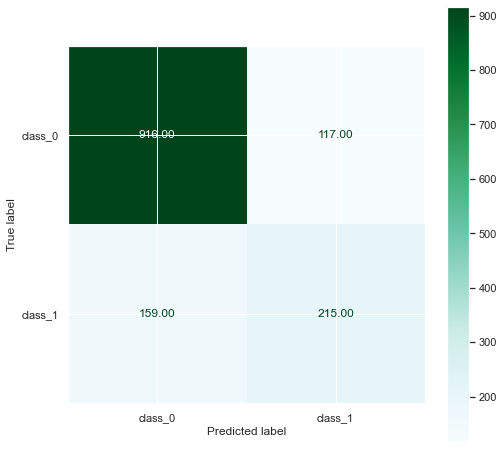

In [127]:
fix, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(estimator=logreg, #model
                      X=X_test_scaled, 
                      y_true=y_test, #y_test
                      ax=ax, 
                      cmap='BuGn', 
                      display_labels=['class_0', 'class_1'], 
                      values_format='.2f',  # .2f 
                      );

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


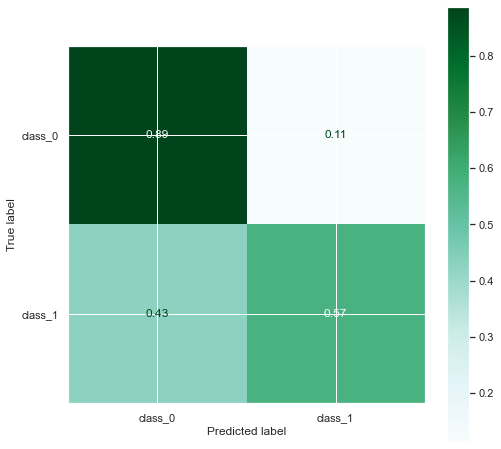

In [128]:
fix, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(estimator=logreg, #model
                      X=X_test_scaled, 
                      y_true=y_test,
                      ax=ax, 
                      cmap='BuGn', 
                      display_labels=['class_0', 'class_1'], 
                      values_format='.2f',  # .2f 
                      normalize='true',  # choices: 'true', 'pred', 'all'
                      );

    - Cứ 100 khách hàng không churn, có 89 người đc predict là không churn, 11 người còn lại đc dự đoán là churn.
    - Cứ 100 khách hàng churn, có 43 người đc dự đoán là không churn, 57 người dự đoán là churn.

**Precision vs Recall**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

- auc: Compute Area Under the Curve (AUC) using the trapezoidal rule.
- roc_auc_score: Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

(0.0, 1.0)

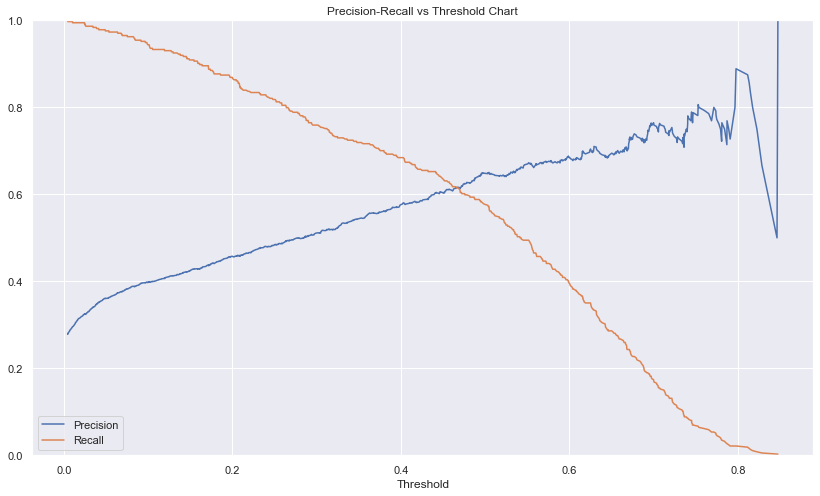

In [129]:
# Predict probabilities 
probs_y=logreg.predict_proba(X_test_scaled) 

precision, recall, thresholds = precision_recall_curve(y_true = y_test, 
                                                      probas_pred = probs_y[:, 1]) 
# pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], label="Precision")
plt.plot(thresholds, recall[: -1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.ylim([0,1])

In [130]:
# 2-D array of probabilities to be classified as class 0 and 1, respectively
probs_y

array([[0.98289408, 0.01710592],
       [0.40411411, 0.59588589],
       [0.99524119, 0.00475881],
       ...,
       [0.86927867, 0.13072133],
       [0.97529106, 0.02470894],
       [0.99561109, 0.00438891]])

In [131]:
temp_thresholds = precision_recall_curve(y_true = y_test, probas_pred = probs_y[:, 1])

In [132]:
df_thresholds = pd.DataFrame(list(temp_thresholds)).T
df_thresholds.rename(columns = {0:'precision',1:'recall', 2:'threshold'}, inplace=True)

In [133]:
df_thresholds.loc[(df_thresholds['threshold'] >= 0.4) & (df_thresholds['threshold'] <= 0.41)]

,precision,recall,threshold
896,0.576577,0.684492,0.400233
897,0.577878,0.684492,0.401787
898,0.579186,0.684492,0.402243
899,0.580499,0.684492,0.402740
900,0.579545,0.681818,0.404082
901,0.578588,0.679144,0.404148
902,0.577626,0.676471,0.404451
903,0.576659,0.673797,0.405253
904,0.577982,0.673797,0.406294
905,0.579310,0.673797,0.409800


***ROC curve***

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=en&authuser=1

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

In [134]:
from sklearn.metrics import plot_roc_curve

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


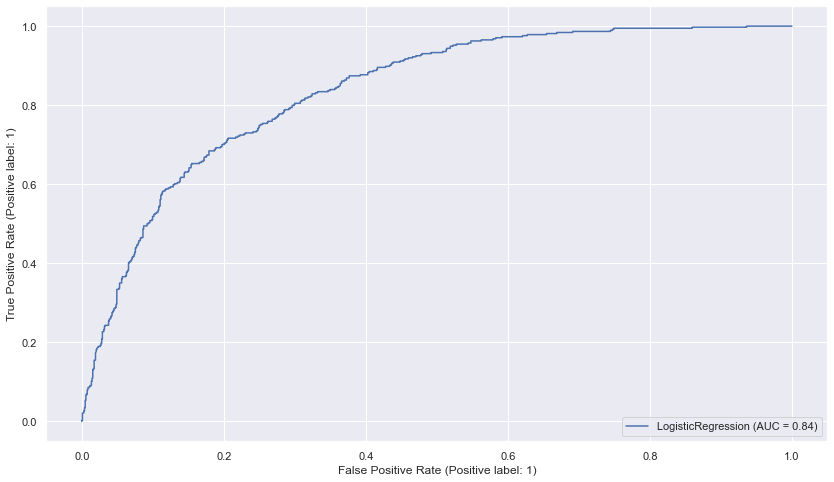

In [135]:
plot_roc_curve(estimator=logreg, 
               X = X_test_scaled,
               y = y_test)

### 4.2 Weights of feature

In [136]:
print('intercept (w_0) =', logreg.intercept_)
print('weights   (w_1 to w_n):', logreg.coef_)

intercept (w_0) = [-1.72428746]
weights   (w_1 to w_n): [[-1.34823924 -0.91512248  0.6409896   0.00584532 -0.00584532 -0.03547367
   0.03547367  0.0066261  -0.0066261   0.05276144 -0.05276144 -0.01687688
   0.01687688 -0.10475146 -0.01687688  0.11599236 -0.3288139   0.40981353
  -0.11521854  0.1179057  -0.11521854 -0.02572836  0.06185502 -0.11521854
   0.0349008   0.01279988 -0.11521854  0.08613289  0.10820766 -0.11521854
  -0.01486895 -0.08150086 -0.11521854  0.17882117 -0.07488916 -0.11521854
   0.17204751  0.32117515 -0.04891624 -0.3269186  -0.07136533  0.07136533
  -0.06069318 -0.04221288  0.11338065 -0.02674809]]


In [137]:
weights_df = pd.DataFrame(
    data=logreg.coef_.T,
    columns=['weight'], 
    index=X.columns
).reset_index().rename(columns={'index':'feature_names'})

In [138]:
weights_df['abs_weight'] = weights_df['weight'].abs()
weights_df = weights_df.sort_values(by='abs_weight', ascending=False)
weights_df.head()

,feature_names,weight,abs_weight
0,tenure,-1.348239,1.348239
1,MonthlyCharges,-0.915122,0.915122
2,TotalCharges,0.640990,0.640990
17,InternetService_Fiber optic,0.409814,0.409814
16,InternetService_DSL,-0.328814,0.328814


In [139]:
weights_df.tail()

,feature_names,weight,abs_weight
25,DeviceProtection_No,0.012800,0.012800
8,Partner_Yes,-0.006626,0.006626
7,Partner_No,0.006626,0.006626
3,gender_Female,0.005845,0.005845
4,gender_Male,-0.005845,0.005845


<BarContainer object of 46 artists>

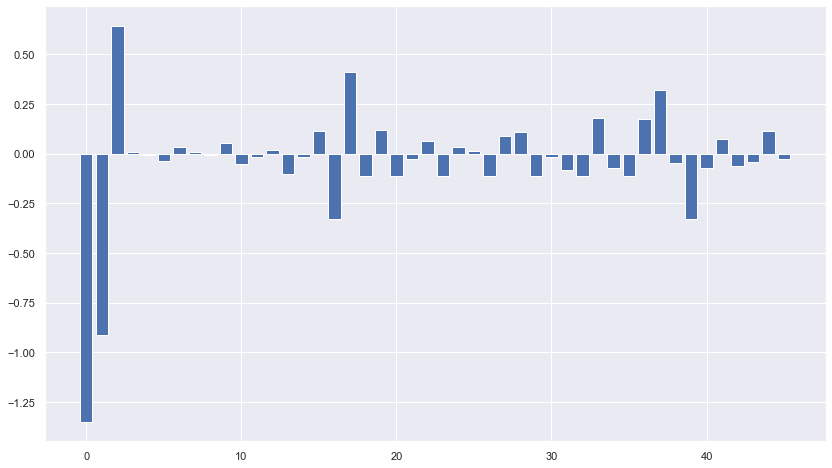

In [140]:
plt.bar(x = weights_df.index, height = weights_df['weight'])

    NX:
    - EDA cho thấy khách hàng có partner có tỉ lệ churn cao hơn, nhưng biến churn lại không phải biến có trọng số lớn trong model